# Danhui's project (Spring 2019)

This project is done partly to support the competitor & market research for REDOX. REDOX is a lab services company that uses novel imaging techniques to provide scientists in pharmaceutical companies with unprecedented subcellular-level metabolic information to help understand drug-cellular interactions and thereby aiding the drug discovery and development process and reducing wasted resources. Through analyzing three optical biomarkers - cellular redox state, bound NADH fraction, and mitochondrial clustering - we are able to provide information on the metabolic activity happening within the cells. Currently we are capable of providing insights into specific metabolic pathways, including glycolysis, glutaminolysis, mitochondrial uncoupling, fatty acid oxidation, and fatty acid synthesis, with single-cell resolution.

Though our previous understanding was that the pharmaceutical industry currently only measures the level of metabolites in cells or bulk metrics and does not measure cell-differentiated metabolic activity, our recent research and interviews reveal that some companies are looking into specific metabolic pathways which overlap with our service offerings. As the field of measuring metabolic activity in drug research is still in its nascent stage, specific disease models that work well with our product are not yet validated. Therefore, through looking into applications of our competitor’s products (published in scientific journals), our team may find drug research of specific disease types/cell lines that may serve our beachhead market. The dataset used in this project is found on Agilent Cell Reference Database:
https://www.agilent.com/cell-reference-database/

### Why is looking into cellular metabolism-related research important?
* Use case 1: The MYC oncogene is frequently mutated and overexpressed in human renal cell carcinoma (RCC). Research shows that MYC-induced RCC up-regulated the glutaminolytic pathway instead of the glycolytic pathway. The pharmacologic inhibition of glutamine metabolism with bis-2-(5-phenylacetamido-1,2,4-thiadiazol-2-yl) ethyl sulfide impeded MYC-mediated tumor progression. Thus, the inhibition of glutamine metabolism is a potential therapeutic approach for the treatment of this disease. (Shroff et al. PNAS 2015)
* Use case 2: Insights into tumor cellular metabolism upon administration of therapeutics can serve as an early predictor of *in vivo* tumor drug response. In the current standard of care, patients with innate drug resistance are not identified *a priori* and drug effectiveness is determined after weeks of treatment from tumor size measurements using mammography, MRI, or ultrasound. Research showed that observations of cellular metabolic changes can predict tumor drug response much earlier than the traditional imaging methods, at about 72 hours after administration. (Walsh et al. 2014)

Learning about more use cases like the aforementioned research areas can help REDOX better navigate the current research landscape and gain an in-depth understanding of current methods used to measure cellular metabolism. With this knowledge, REDOX can hope to best position itself in the market with its differentiating features.



In [1]:
import pandas as pd
import numpy as np

# Generate Word Cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./CellLineInput.csv')
data.head()

,Title,Authors,Journal,Publication date,Research area,Cell Line,Cell Type,Species,Analyzer,XF Assay,Plate Reader Assay,Seeding density,Plate coating
0,_-1-Antitrypsin (AAT)-modified donor cells sup...,"Marcondes AM, Karoopongse E, Lesnikova M, Marg...",Blood,Oct 1 2014 12:00 AM,Immunology Research,T-cells,T-cells,Mouse,24,Cell Mitochondrial Stress Test,NaN,8.0x10^5 cells/well,Not Specified
1,_-1-Antitrypsin (AAT)-modified donor cells sup...,"Marcondes AM, Karoopongse E, Lesnikova M, Marg...",Blood,Oct 1 2014 12:00 AM,Immunology Research,Natural Killer (NK) cells,Immune Cells,Mouse,24,Cell Mitochondrial Stress Test,NaN,8.0x10^5 cells/well,Not Specified
2,_-enolase regulates the malignant phenotype of...,"J. Dai, Q. Zhou, J. Chen, M. L. Rexius-Hall, J...",Nat Commun,Sep 21 2018 12:00 AM,Cell Physiology Research,Pulmonary Artery Smooth Muscle Cells (PASMC),Pulmonary Artery Cells,Human,24,Cell Mitochondrial Stress Test,NaN,3.0 x10^4 cells/well,Not Specified
3,_-enolase regulates the malignant phenotype of...,"J. Dai, Q. Zhou, J. Chen, M. L. Rexius-Hall, J...",Nat Commun,Sep 21 2018 12:00 AM,Cell Physiology Research,Pulmonary Artery Smooth Muscle Cells (PASMC),Pulmonary Artery Cells,Human,24,Glycolysis Stress Test,NaN,3.0 x10^4 cells/well,Not Specified
4,_-ketoglutarate orchestrates macrophage activa...,"P. S. Liu, H. Wang, X. Li, T. Chao, T. Teav, S...",Nat Immunol,Sep 1 2017 12:00 AM,Immunology Research,Bone Marrow-Derived Macrophages (BMDM),Immune Cells,Mouse,96,Cell Mitochondrial Stress Test,NaN,1.0 x10^5 cells/well,Not Specified


In [3]:
rows = len(data.index)
print ('Number of rows in the table: ', rows)

Number of rows in the table:  9634


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 13 columns):
Title                 9634 non-null object
Authors               9632 non-null object
Journal               9596 non-null object
Publication date      9628 non-null object
Research area         9634 non-null object
Cell Line             9620 non-null object
Cell Type             9626 non-null object
Species               9562 non-null object
Analyzer              9615 non-null object
XF Assay              9232 non-null object
Plate Reader Assay    345 non-null object
Seeding density       9579 non-null object
Plate coating         9581 non-null object
dtypes: object(13)
memory usage: 978.5+ KB


## Data cleaning

### 1. Research area

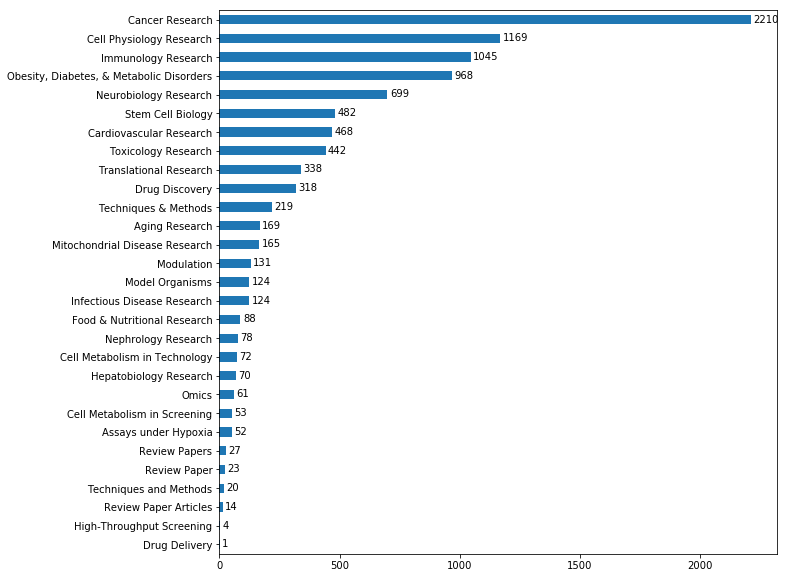

In [5]:
plot1 = data['Research area'].value_counts().plot(kind='barh', figsize=(10,10))
plot1.invert_yaxis()

# create a list to collect the plt.patches data
totals1 = []

# find the values and append to list
for i in plot1.patches:
    totals1.append(i.get_width())

# set individual bar labels using above list
total1 = sum(totals1)

# set individual bar labels using above list
for i in plot1.patches:
    # get_width pulls left or right; get_y pushes up or down
    plot1.text(i.get_width()+10.0, i.get_y()+.38, str(i.get_width()))

Several categories need to be combined

### 2. Research publication date

Since publication date column data are objects like the other

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 13 columns):
Title                 9634 non-null object
Authors               9632 non-null object
Journal               9596 non-null object
Publication date      9628 non-null datetime64[ns]
Research area         9634 non-null object
Cell Line             9620 non-null object
Cell Type             9626 non-null object
Species               9562 non-null object
Analyzer              9615 non-null object
XF Assay              9232 non-null object
Plate Reader Assay    345 non-null object
Seeding density       9579 non-null object
Plate coating         9581 non-null object
dtypes: datetime64[ns](1), object(12)
memory usage: 978.5+ KB


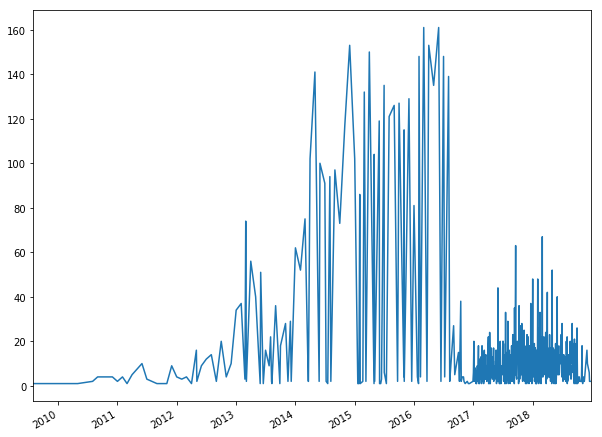

In [6]:
# convert the 'Date' column to datetime format 
data['Publication date']= pd.to_datetime(data['Publication date']) 
  
# Check the format of 'Date' column 
data.info() 

# data.sort('Date')
df_sorted_by_date = data.sort_values(by=['Publication date'])
# df_sorted_by_date.head()

df_sorted_by_date['Publication date'].value_counts().sort_index().plot(kind='line', figsize=(10,8))

Date need to be cleaned

### 3. Cell line

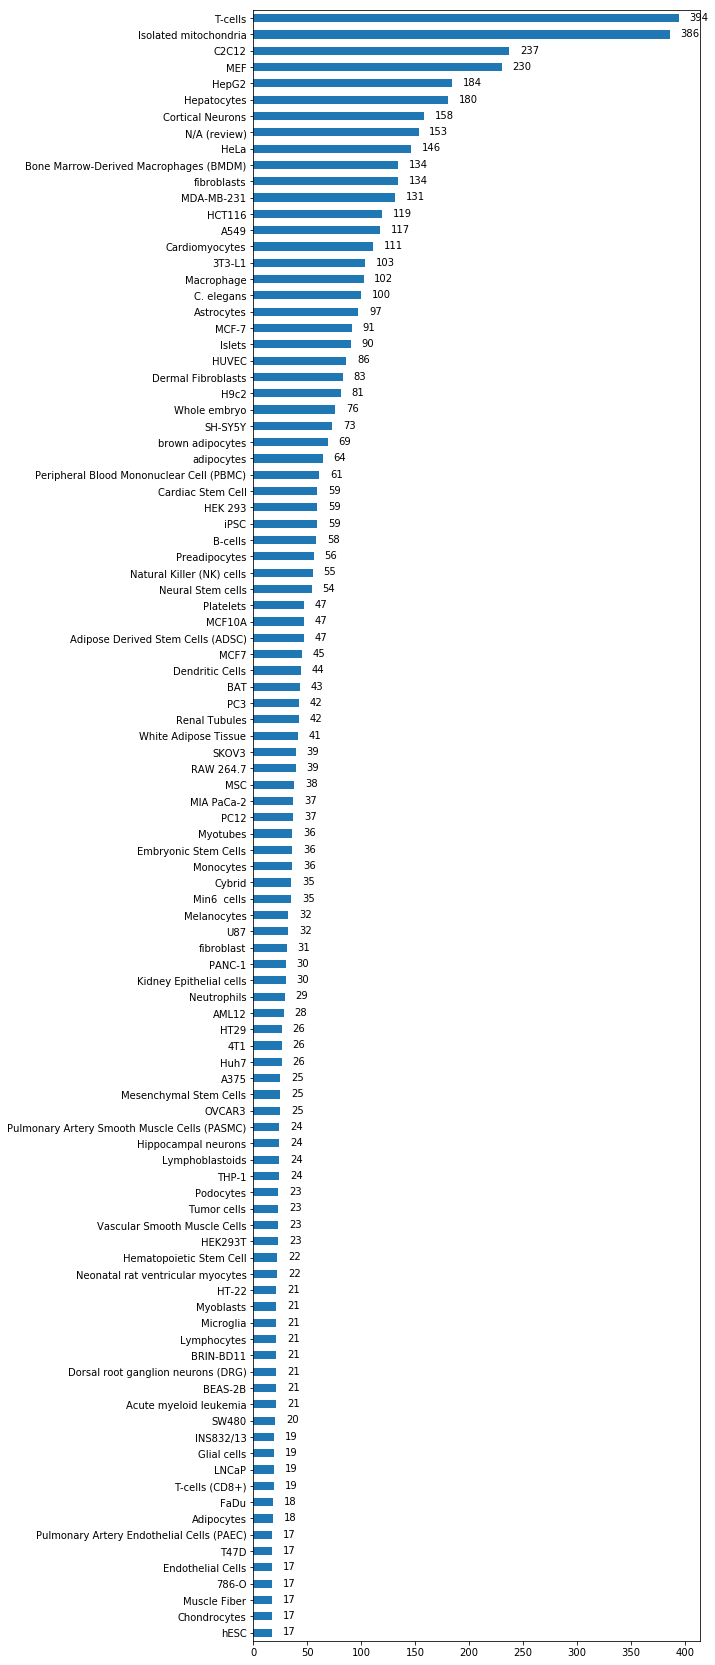

In [7]:
plot3 = data['Cell Line'].value_counts()[:100].plot(kind='barh', figsize=(8,30))
plot3.invert_yaxis()

# create a list to collect the plt.patches data
totals3 = []

# find the values and append to list
for i in plot3.patches:
    totals3.append(i.get_width())

# set individual bar labels using above list
total3 = sum(totals3)

# set individual bar labels using above list
for i in plot3.patches:
    # get_width pulls left or right; get_y pushes up or down
    plot3.text(i.get_width()+10.0, i.get_y()+.38, str(i.get_width()))

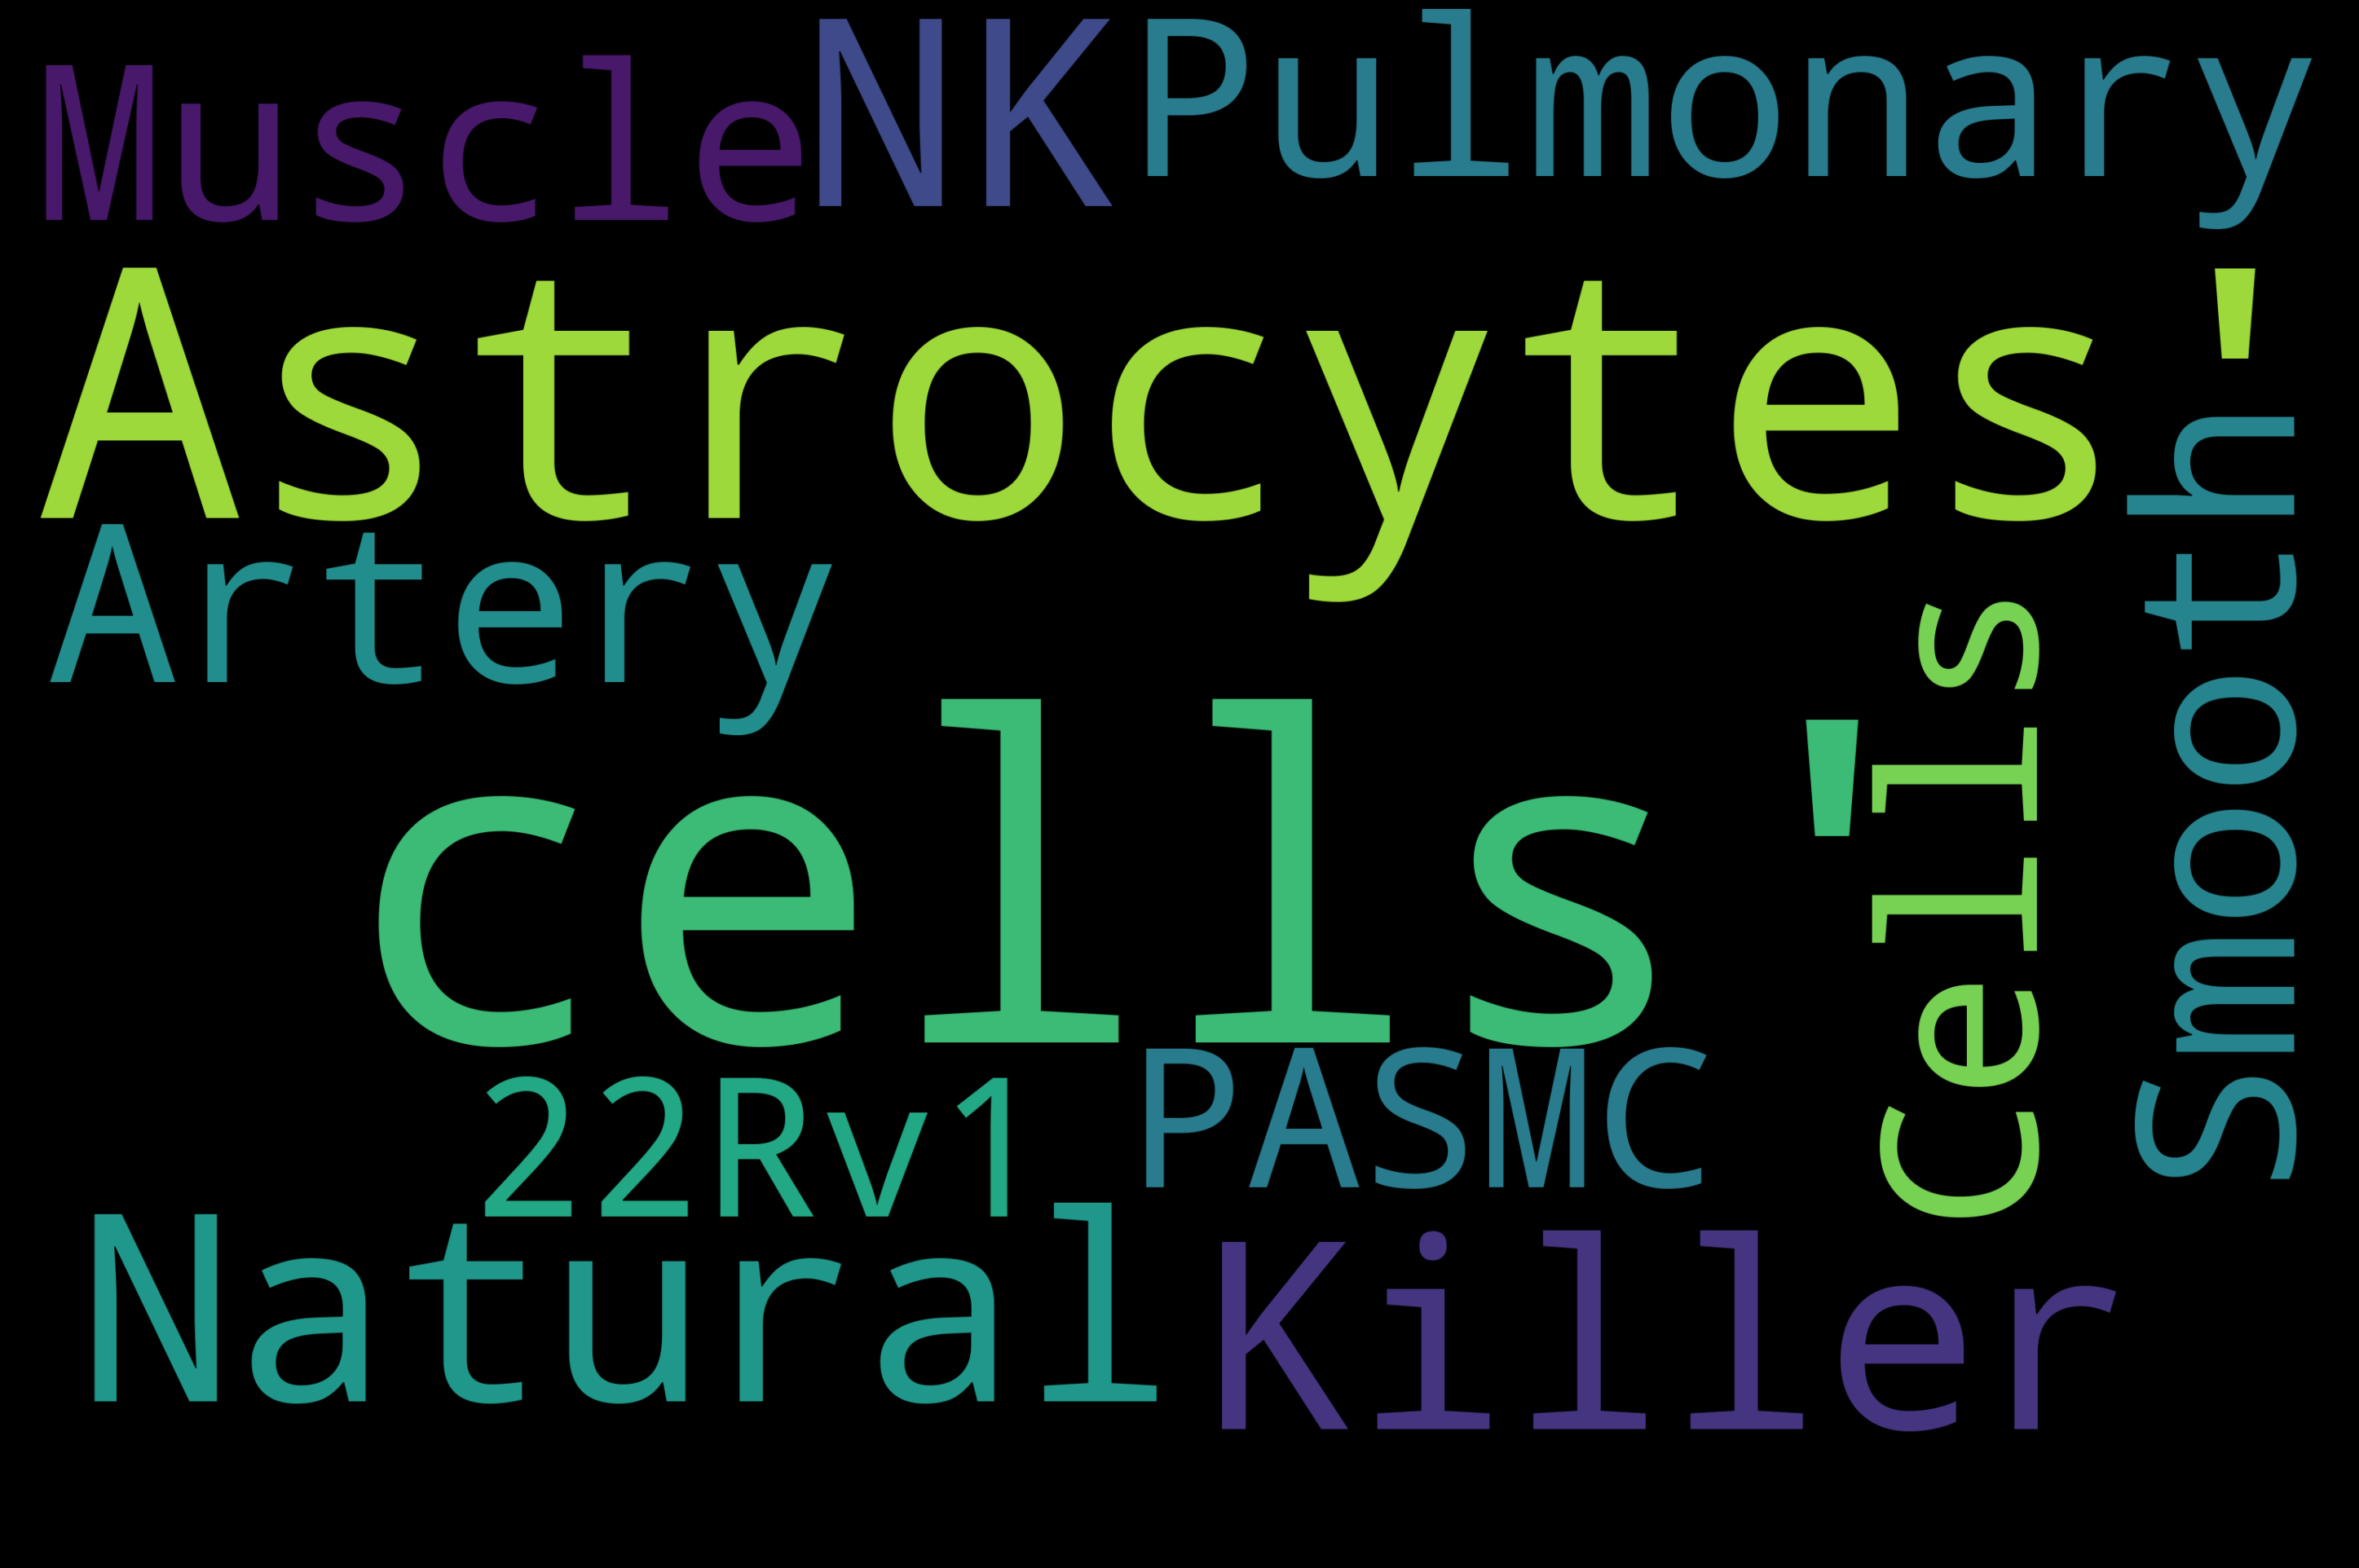

In [8]:
text = data['Cell Line'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 4. Metabolic assays

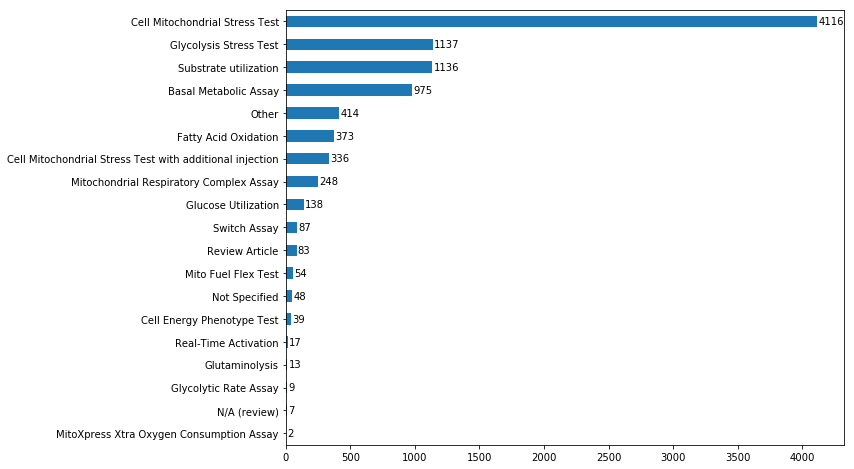

In [9]:
plot4 = data['XF Assay'].value_counts().plot(kind='barh', figsize=(10,8))
plot4.invert_yaxis()
# create a list to collect the plt.patches data
totals4 = []

# find the values and append to list
for i in plot1.patches:
    totals4.append(i.get_width())

# set individual bar lables using above list
total4 = sum(totals4)

# set individual bar lables using above list
for i in plot4.patches:
    # get_width pulls left or right; get_y pushes up or down
    plot4.text(i.get_width()+10.0, i.get_y()+.38, str(i.get_width()))

**Cell Mitochondrial Stress Test**: measures basal respiration, ATP-linked respiration, H+ (Proton) leak, maximal respiration, spare respiratory capacity, and non-mitochondrial respiration using modulators of cellular respiration.

**Glycolysis Stress Test**: measures basal glycolysis and glycolysis capacity upon blockage of mitochondrial ATP production using respiratory modulators. Non-glycolytic acidification is assessed through glucose starvation.

**Substrate Utilization**

**Basal Metabolic Assay**

**Fatty Acid Oxidation**

**Mitochondrial Respiratory Complex Assay**

**Glucose Utilization**

**Switch Assay**

**Mito Fuel Flex Test**

**Cell Energy Phenotype Test**

**Real-Time Activation**

**Glutaminolysis**

**Glycolytic Rate Assay**

**MitoXpress Xtra Oxygen Consumption Assay**